<a href="https://colab.research.google.com/github/Mohammad-Mahdi1999/Multiplication-via-Neural-Network/blob/master/Multiplication_via_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras

# Generate Dataset

In [3]:
x_1 = np.random.randint(0,10_000,1_000_000)
x_2 = np.random.randint(0,10_000,1_000_000)
y = x_1 * x_2 + 5

In [4]:
df = pd.DataFrame({
    "x_1" : x_1,
    "x_2" : x_2,
    "y" : y,

})

df

,x_1,x_2,y
0,8712,9469,82493933
1,3677,5555,20425740
2,5998,1412,8469181
3,7723,4684,36174537
4,7280,5411,39392085
...,...,...,...
999995,6017,6271,37732612
999996,9518,1350,12849305
999997,326,2131,694711
999998,3596,1807,6497977


## Data Preprocessing

In [5]:

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

df_scaled = pd.DataFrame(scaler.fit_transform(df.to_numpy()), columns=df.columns)
df_scaled

,x_1,x_2,y
0,0.871287,0.946995,0.825187
1,0.367737,0.555556,0.204319
2,0.599860,0.141214,0.084717
3,0.772377,0.468447,0.361854
4,0.728073,0.541154,0.394039
...,...,...,...
999995,0.601760,0.627163,0.377439
999996,0.951895,0.135014,0.128532
999997,0.032603,0.213121,0.006949
999998,0.359636,0.180718,0.064999


## Data Cleaning

In [6]:
print (f"There are {df_scaled.duplicated().sum()} duplicate records in dataset")

# Drop duplicates

df_scaled.drop_duplicates(inplace = True)
print("Dataset length after droping duplicatets: ", len(df_scaled))

There are 4872 duplicate records in dataset
Dataset length after droping duplicatets:  995128


## Data Splitting

In [7]:
X_train = df_scaled[["x_1","x_2"]][:800000]
Y_train = df_scaled[["y"]][:800000]
X_test = df_scaled[["x_1","x_2"]][800000:]
Y_test = df_scaled[["y"]][800000:]

print(f"Lenght of Train Data: {X_train.shape}")
print(f"Lenght of Test Data: {X_test.shape}")

Lenght of Train Data: (800000, 2)
Lenght of Test Data: (195128, 2)


# Modeling

In [8]:
from keras import layers
from sklearn.metrics import r2_score
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from keras.callbacks import ReduceLROnPlateau

## FFN : One Hidden Layer

In [10]:
model = keras.Sequential()
model.add(layers.Dense(64,activation="relu",input_dim=2))
model.add(layers.Dense(1,activation="linear"))

model.summary()

# Compile the Model
model.compile(loss = 'MSE',
              optimizer="adam")

# Callbacks Configs
earlyStopping = EarlyStopping(monitor='val_loss', patience=10, verbose=0, mode='min')
mcp_save = ModelCheckpoint('.mdl_wts.hdf5', save_best_only=True, monitor='val_loss', mode='min')
reduce_lr_loss = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=7, verbose=1, epsilon=1e-4, mode='min')

history = model.fit(X_train,Y_train,batch_size=64,epochs=100,validation_split=0.2,callbacks=[earlyStopping, mcp_save, reduce_lr_loss],)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                192       
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 257 (1.00 KB)
Trainable params: 257 (1.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Epoch 1/100
10000/10000 [==============================] - 39s 3ms/step - loss: 5.0590e-04 - val_loss: 1.7739e-06 - lr: 0.0010
Epoch 2/100
   69/10000 [..............................] - ETA: 22s - loss: 2.9748e-06

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


10000/10000 [==============================] - 30s 3ms/step - loss: 1.5022e-06 - val_loss: 1.6513e-06 - lr: 0.0010
Epoch 3/100
10000/10000 [==============================] - 29s 3ms/step - loss: 1.2592e-06 - val_loss: 9.0362e-07 - lr: 0.0010
Epoch 4/100
10000/10000 [==============================] - 31s 3ms/step - loss: 1.1692e-06 - val_loss: 7.1976e-07 - lr: 0.0010
Epoch 5/100
10000/10000 [==============================] - 31s 3ms/step - loss: 1.1338e-06 - val_loss: 1.1583e-06 - lr: 0.0010
Epoch 6/100
10000/10000 [==============================] - 29s 3ms/step - loss: 1.1042e-06 - val_loss: 5.8195e-07 - lr: 0.0010
Epoch 7/100
10000/10000 [==============================] - 29s 3ms/step - loss: 1.0954e-06 - val_loss: 6.1329e-07 - lr: 0.0010
Epoch 8/100
10000/10000 [==============================] - ETA: 0s - loss: 1.0339e-06
Epoch 8: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
10000/10000 [==============================] - 29s 3ms/step - loss: 1.0339e-06 - val_lo

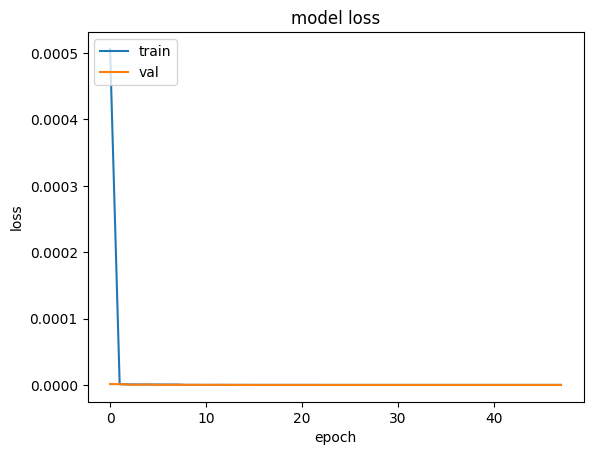

In [11]:
from matplotlib import pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

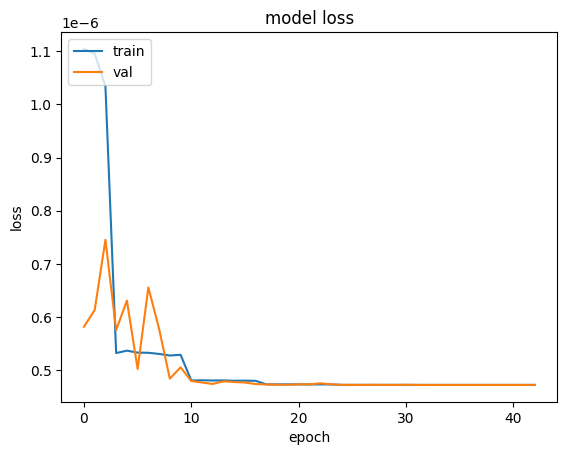

In [12]:
from matplotlib import pyplot as plt
plt.plot(history.history['loss'][5:])
plt.plot(history.history['val_loss'][5:])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

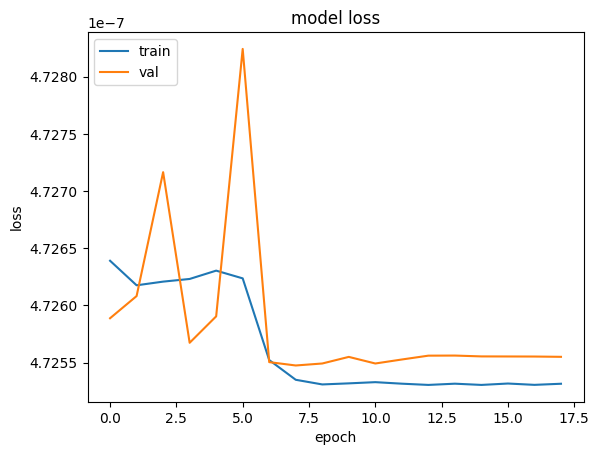

In [13]:
from matplotlib import pyplot as plt
plt.plot(history.history['loss'][30:])
plt.plot(history.history['val_loss'][30:])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

### ٍEvaluate Model

In [14]:
model.evaluate(X_test,Y_test)

6096/6096 [==============================] - 13s 2ms/step - loss: 4.7215e-07


4.7215209519890777e-07

In [15]:
y_predicted = model.predict(X_test)

6096/6096 [==============================] - 11s 2ms/step


In [16]:
from sklearn.metrics import (
    mean_absolute_error,
    mean_squared_error,
    r2_score,
)

print('MAE: ',mean_absolute_error(Y_test, y_predicted))
print('MSE: ',mean_squared_error(Y_test, y_predicted))
print('R2_score: ',r2_score(Y_test, y_predicted))


MAE:  0.0005479935321854128
MSE:  4.7215244692417704e-07
R2_score:  0.9999903359938178


### Let's test the model

In [17]:
test_data = X_test.iloc[:1]
print("Data :")
display(test_data)
print("------------------------------------")
print("lable :",)
display(Y_test.iloc[:1])
print("------------------------------------")
predicted = model.predict(test_data)
print("------------------------------------")
print(f"Model scaled Prediction is : {predicted}")
output = scaler.inverse_transform([[np.nan,np.nan,predicted[0][0]]])
print(f"Model Prediction is : {output[0][2]}")

Data :


,x_1,x_2
803165,0.978398,0.547255


------------------------------------
lable :


,y
803165,0.536237


------------------------------------
1/1 [==============================] - 0s 20ms/step
------------------------------------
Model scaled Prediction is : [[0.5364693]]
Model Prediction is : 53555741.87776184


### Let's test the model via unseen data

In [18]:
num_1 = 8000
num_2 = 3000
unseen_data = scaler.transform([[num_1,num_2,np.nan]])
print("Data :",unseen_data)
print("Label :" )
print("Actual Multiplication :",num_1*num_2 +5)
print("------------------------------------")
predicted = model.predict(unseen_data[:,:2])
print("------------------------------------")
print(f"Model scaled Prediction is : {predicted}")
output = scaler.inverse_transform([[np.nan,np.nan,predicted[0][0]]])
print(f"Model Prediction is : {output[0][2]}")

Data : [[0.80008001 0.30003           nan]]
Label :
Actual Multiplication : 24000005
------------------------------------
1/1 [==============================] - 0s 51ms/step
------------------------------------
Model scaled Prediction is : [[0.24092543]]
Model Prediction is : 24051594.656646732


In [19]:
num_1 = 8
num_2 = 4
unseen_data = scaler.transform([[num_1,num_2,np.nan]])
print("Data :",unseen_data)
print("Label :" )
print("Actual Multiplication :",num_1*num_2 +5)
print("------------------------------------")
predicted = model.predict(unseen_data[:,:2])
print("------------------------------------")
print(f"Model scaled Prediction is : {predicted}")
output = scaler.inverse_transform([[np.nan,np.nan,predicted[0][0]]])
print(f"Model Prediction is : {output[0][2]}")

Data : [[0.00080008 0.00040004        nan]]
Label :
Actual Multiplication : 37
------------------------------------
1/1 [==============================] - 0s 59ms/step
------------------------------------
Model scaled Prediction is : [[-0.00527963]]
Model Prediction is : -527060.5895614624


## FFN : Two Hidden Layer

In [ ]:
model = keras.Sequential()
model.add(layers.Dense(64,activation="relu",input_dim=2))
model.add(layers.Dense(64,activation="relu"))
model.add(layers.Dense(1,activation="linear"))

model.summary()

# Compile the Model
model.compile(loss = 'MSE',
              optimizer="adam")

# Callbacks Configs
earlyStopping = EarlyStopping(monitor='val_loss', patience=10, verbose=0, mode='min')
mcp_save = ModelCheckpoint('.mdl_wts.hdf5', save_best_only=True, monitor='val_loss', mode='min')
reduce_lr_loss = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=7, verbose=1, epsilon=1e-4, mode='min')

history = model.fit(X_train,Y_train,batch_size=64,epochs=100,validation_split=0.2,callbacks=[earlyStopping, mcp_save, reduce_lr_loss],)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 64)                192       
                                                                 
 dense_4 (Dense)             (None, 64)                4160      
                                                                 
 dense_5 (Dense)             (None, 1)                 65        
                                                                 
Total params: 4417 (17.25 KB)
Trainable params: 4417 (17.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Epoch 1/100
10000/10000 [==============================] - 37s 3ms/step - loss: 0.0017 - val_loss: 2.2257e-05 - lr: 0.0010
Epoch 2/100
   63/10000 [..............................] - ETA: 24s - loss: 1.5908e-05

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


10000/10000 [==============================] - 35s 3ms/step - loss: 2.5534e-05 - val_loss: 4.0732e-06 - lr: 0.0010
Epoch 3/100
10000/10000 [==============================] - 29s 3ms/step - loss: 1.7490e-05 - val_loss: 8.3898e-06 - lr: 0.0010
Epoch 4/100
10000/10000 [==============================] - 32s 3ms/step - loss: 1.5373e-05 - val_loss: 4.8172e-06 - lr: 0.0010
Epoch 5/100
10000/10000 [==============================] - 31s 3ms/step - loss: 1.2696e-05 - val_loss: 5.8235e-06 - lr: 0.0010
Epoch 6/100
10000/10000 [==============================] - 30s 3ms/step - loss: 1.3037e-05 - val_loss: 4.5417e-06 - lr: 0.0010
Epoch 7/100
10000/10000 [==============================] - 32s 3ms/step - loss: 1.0587e-05 - val_loss: 4.4341e-06 - lr: 0.0010
Epoch 8/100
 9981/10000 [============================>.] - ETA: 0s - loss: 1.1161e-05
Epoch 8: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
10000/10000 [==============================] - 29s 3ms/step - loss: 1.1148e-05 - val_lo

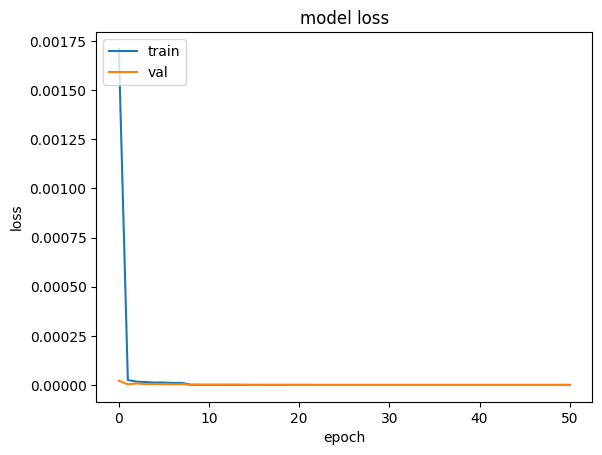

In [ ]:
from matplotlib import pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
from matplotlib import pyplot as plt
plt.plot(history.history['loss'][5:])
plt.plot(history.history['val_loss'][5:])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

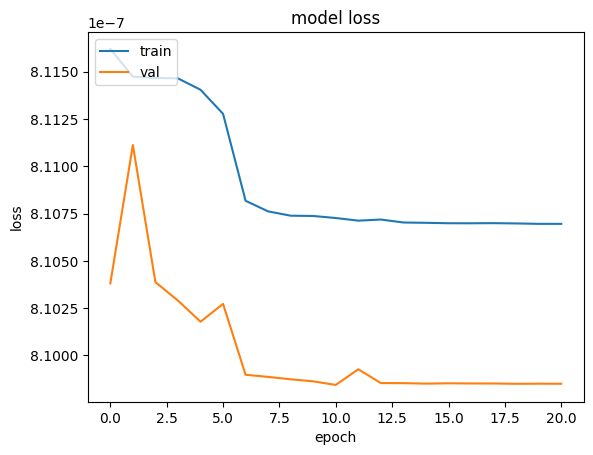

In [ ]:
from matplotlib import pyplot as plt
plt.plot(history.history['loss'][30:])
plt.plot(history.history['val_loss'][30:])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

### ٍEvaluate Model

In [ ]:
model.evaluate(X_test,Y_test)

6093/6093 [==============================] - 13s 2ms/step - loss: 8.1234e-07


8.123406018967216e-07

In [ ]:
y_predicted = model.predict(X_test)

In [ ]:
from sklearn.metrics import (
    mean_absolute_error,
    mean_squared_error,
    r2_score,
)

print('MAE: ',mean_absolute_error(Y_test, y_predicted))
print('MSE: ',mean_squared_error(Y_test, y_predicted))
print('R2_score: ',r2_score(Y_test, y_predicted))


MAE:  0.000706885314877243
MSE:  8.123406824961714e-07
R2_score:  0.9999991873627554


### Let's test the model

In [ ]:
test_data = X_test.iloc[:1]
print("Data :")
display(test_data)
print("------------------------------------")
print("lable :",)
display(Y_test.iloc[:1])
print("------------------------------------")
predicted = model.predict(test_data)
print("------------------------------------")
print(f"Model scaled Prediction is : {predicted}")
output = scaler.inverse_transform([[np.nan,np.nan,predicted[0][0]]])
print(f"Model Prediction is : {output[0][2]}")

### Let's test the model via unseen data

In [ ]:
num_1 = 8000
num_2 = 3000
unseen_data = scaler.transform([[num_1,num_2,np.nan]])
print("Data :",unseen_data)
print("Label :" )
print("Actual Multiplication :",num_1*num_2 +5)
print("------------------------------------")
predicted = model.predict(unseen_data[:,:2])
print("------------------------------------")
print(f"Model scaled Prediction is : {predicted}")
output = scaler.inverse_transform([[np.nan,np.nan,predicted[0][0]]])
print(f"Model Prediction is : {output[0][2]}")

Data : [[ 1.03774632 -0.69262191         nan]]
Label :
Actual Multiplication : 24000005
------------------------------------
1/1 [==============================] - 0s 57ms/step
------------------------------------
Model scaled Prediction is : [[-0.04481017]]
Model Prediction is : 24023951.601729915
Data : [[ 1.03774632 -0.69262191         nan]]
Label :
Actual Multiplication : 24000005
------------------------------------
1/1 [==============================] - 0s 57ms/step
------------------------------------
Model scaled Prediction is : [[-0.04481017]]
Model Prediction is : 24023951.601729915


In [ ]:
num_1 = 4455
num_2 = 5556
unseen_data = scaler.transform([[num_1,num_2,np.nan]])
print("Data :",unseen_data)
print("Label :" )
print("Actual Multiplication :",num_1*num_2 +5)
print("------------------------------------")
predicted = model.predict(unseen_data[:,:2])
print("------------------------------------")
print(f"Model scaled Prediction is : {predicted}")
output = scaler.inverse_transform([[np.nan,np.nan,predicted[0][0]]])
print(f"Model Prediction is : {output[0][2]}")

Data : [[-0.18925441  0.19237757         nan]]
Label :
Actual Multiplication : 24751985
------------------------------------
1/1 [==============================] - 0s 18ms/step
------------------------------------
Model scaled Prediction is : [[-0.01235055]]
Model Prediction is : 24740506.189390738


In [ ]:
num_1 = 50
num_2 = 34
unseen_data = scaler.transform([[num_1,num_2,np.nan]])
print("Data :",unseen_data)
print("Label :" )
print("Actual Multiplication :",num_1*num_2 +5)
print("------------------------------------")
predicted = model.predict(unseen_data[:,:2])
print("------------------------------------")
print(f"Model scaled Prediction is : {predicted}")
output = scaler.inverse_transform([[np.nan,np.nan,predicted[0][0]]])
print(f"Model Prediction is : {output[0][2]}")

Data : [[-1.71391962 -1.7195814          nan]]
Label :
Actual Multiplication : 1705
------------------------------------
1/1 [==============================] - 0s 18ms/step
------------------------------------
Model scaled Prediction is : [[-1.1391819]]
Model Prediction is : -134592.9642238319


## CNN : 1D

In [ ]:
sample_size = X_train.shape[0] # number of samples in train set
time_steps  = X_train.shape[1] # number of features in train set
input_dimension = 1               # each feature is represented by 1 number

train_data_reshaped = X_train.to_numpy().reshape(sample_size,time_steps,input_dimension)
print("After reshape train data set shape:\n", train_data_reshaped.shape)
print("1 Sample shape:\n",train_data_reshaped[0].shape)
print("An example sample:\n", train_data_reshaped[0])

After reshape train data set shape:
 (800000, 2, 1)
1 Sample shape:
 (2, 1)
An example sample:
 [[-0.52729616]
 [-0.0170842 ]]


In [ ]:
test_data_reshaped = X_test.to_numpy().reshape(X_test.shape[0],X_test.shape[1],1)

In [ ]:
from keras.optimizers import RMSprop
def build_conv1D_model():
  n_timesteps = train_data_reshaped.shape[1] #13
  n_features  = train_data_reshaped.shape[2] #1
  model = keras.Sequential(name="model_conv1D")
  model.add(keras.layers.Input(shape=(n_timesteps,n_features)))
  model.add(keras.layers.Conv1D(filters=64, kernel_size=1, activation='relu', name="Conv1D_1"))
  model.add(keras.layers.Dropout(0.5))
  # model.add(keras.layers.Conv1D(filters=32, kernel_size=3, activation='relu', name="Conv1D_2"))

  # model.add(keras.layers.Conv1D(filters=16, kernel_size=2, activation='relu', name="Conv1D_3"))

  model.add(keras.layers.MaxPooling1D(pool_size=2, name="MaxPooling1D"))
  model.add(keras.layers.Flatten())
  model.add(keras.layers.Dense(32, activation='relu', name="Dense_1"))
  model.add(keras.layers.Dense(1, name="Dense_2"))


  optimizer = tf.keras.optimizers.RMSprop(0.001)

  model.compile(loss='mse',optimizer=optimizer,metrics=['mae'])
  return model

model_conv1D = build_conv1D_model()
model_conv1D.summary()

Model: "model_conv1D"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Conv1D_1 (Conv1D)           (None, 2, 64)             128       
                                                                 
 dropout_6 (Dropout)         (None, 2, 64)             0         
                                                                 
 MaxPooling1D (MaxPooling1D  (None, 1, 64)             0         
 )                                                               
                                                                 
 flatten_2 (Flatten)         (None, 64)                0         
                                                                 
 Dense_1 (Dense)             (None, 32)                2080      
                                                                 
 Dense_2 (Dense)             (None, 1)                 33        
                                                      

In [ ]:

# Callbacks Configs
earlyStopping = EarlyStopping(monitor='val_loss', patience=10, verbose=0, mode='min')
mcp_save = ModelCheckpoint('.mdl_wts.hdf5', save_best_only=True, monitor='val_loss', mode='min')
reduce_lr_loss = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=7, verbose=1, epsilon=1e-4, mode='min')

# Store training stats
history = model_conv1D.fit(X_train, Y_train, epochs=1000, batch_size = 64,
                    validation_split=0.2, verbose=1,callbacks=[earlyStopping, mcp_save, reduce_lr_loss])

Epoch 1/1000
10000/10000 [==============================] - 51s 5ms/step - loss: 0.0162 - mae: 0.0880 - val_loss: 0.0363 - val_mae: 0.1566 - lr: 0.0010
Epoch 2/1000
   38/10000 [..............................] - ETA: 41s - loss: 0.0087 - mae: 0.0688

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


10000/10000 [==============================] - 37s 4ms/step - loss: 0.0080 - mae: 0.0644 - val_loss: 0.0410 - val_mae: 0.1715 - lr: 0.0010
Epoch 3/1000
10000/10000 [==============================] - 38s 4ms/step - loss: 0.0072 - mae: 0.0603 - val_loss: 0.0370 - val_mae: 0.1574 - lr: 0.0010
Epoch 4/1000
10000/10000 [==============================] - 36s 4ms/step - loss: 0.0069 - mae: 0.0585 - val_loss: 0.0407 - val_mae: 0.1729 - lr: 0.0010
Epoch 5/1000
10000/10000 [==============================] - 36s 4ms/step - loss: 0.0068 - mae: 0.0572 - val_loss: 0.0347 - val_mae: 0.1552 - lr: 0.0010
Epoch 6/1000
10000/10000 [==============================] - 35s 4ms/step - loss: 0.0069 - mae: 0.0566 - val_loss: 0.0351 - val_mae: 0.1593 - lr: 0.0010
Epoch 7/1000
10000/10000 [==============================] - 37s 4ms/step - loss: 0.0069 - mae: 0.0560 - val_loss: 0.0369 - val_mae: 0.1665 - lr: 0.0010
Epoch 8/1000
10000/10000 [==============================] - 52s 5ms/step - loss: 0.0067 - mae: 0.0550

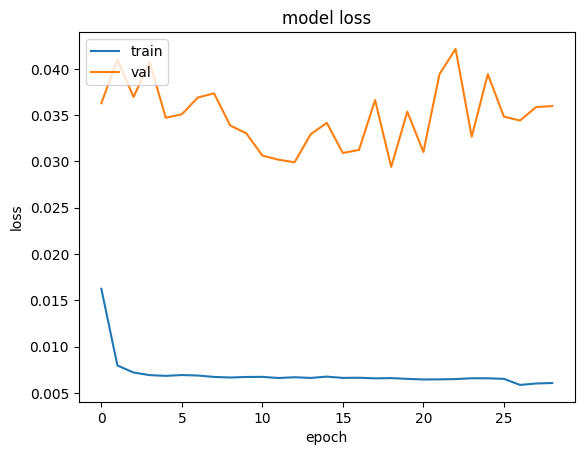

In [ ]:
from matplotlib import pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
[loss, mae] = model_conv1D.evaluate(test_data_reshaped, Y_test, verbose=0)
print("Testing set Mean Abs Error: {:7.2f}".format(mae * 1000) )

Testing set Mean Abs Error:  162.04


In [ ]:
test_predictions = model_conv1D.predict(test_data_reshaped).flatten()
# plot_prediction(X_test, test_predictions)

In [ ]:
from matplotlib import pyplot as plt
plt.plot(history.history['loss'][30:])
plt.plot(history.history['val_loss'][30:])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

### ٍEvaluate Model

In [ ]:
model.evaluate(X_test,Y_test)

In [ ]:
y_predicted = model.predict(X_test)

In [ ]:
from sklearn.metrics import (
    mean_absolute_error,
    mean_squared_error,
    r2_score,
)

print('MAE: ',mean_absolute_error(Y_test, y_predicted))
print('MSE: ',mean_squared_error(Y_test, y_predicted))
print('R2_score: ',r2_score(Y_test, y_predicted))


### Let's test the model

In [ ]:
test_data = X_test.iloc[:1]
print("Data :")
display(test_data)
print("------------------------------------")
print("lable :",)
display(Y_test.iloc[:1])
print("------------------------------------")
predicted = model.predict(test_data)
print("------------------------------------")
print(f"Model scaled Prediction is : {predicted}")
output = scaler.inverse_transform([[np.nan,np.nan,predicted[0][0]]])
print(f"Model Prediction is : {output[0][2]}")

### Let's test the model via unseen data

In [ ]:
num_1 = 8000
num_2 = 3000
unseen_data = scaler.transform([[num_1,num_2,np.nan]])
print("Data :",unseen_data)
print("Label :" )
print("Actual Multiplication :",num_1*num_2 +5)
print("------------------------------------")
predicted = model.predict(unseen_data[:,:2])
print("------------------------------------")
print(f"Model scaled Prediction is : {predicted}")
output = scaler.inverse_transform([[np.nan,np.nan,predicted[0][0]]])
print(f"Model Prediction is : {output[0][2]}")

# Data Normalization via Log

In [9]:
def log_normalize(f):
    return np.log(f + 2)

def inverse_log_normalize(f):
    f = np.exp(f)
    return f - 2

df_log_scaled = pd.DataFrame(log_normalize(df.to_numpy()), columns=df.columns)
df_log_scaled

,x_1,x_2,y
0,9.072686,9.155990,18.228235
1,8.210396,8.622814,16.832307
2,8.699515,7.254178,15.951945
3,8.952217,8.452335,17.403866
4,8.893161,8.596559,17.489076
...,...,...,...
999995,8.702676,8.744010,17.446035
999996,9.161150,7.209340,16.368800
999997,5.793014,7.665285,13.451254
999998,8.188133,7.500529,15.687002


## Data Cleaning

In [10]:
print (f"There are {df_log_scaled.duplicated().sum()} duplicate records in dataset")

# Drop duplicates

df_log_scaled.drop_duplicates(inplace = True)
print("Dataset length after droping duplicatets: ", len(df_log_scaled))

There are 4872 duplicate records in dataset
Dataset length after droping duplicatets:  995128


## Data Splitting

In [11]:
X_train = df_log_scaled[["x_1","x_2"]][:800000]
Y_train = df_log_scaled[["y"]][:800000]
X_test = df_log_scaled[["x_1","x_2"]][800000:]
Y_test = df_log_scaled[["y"]][800000:]

print(f"Lenght of Train Data: {X_train.shape}")
print(f"Lenght of Test Data: {X_test.shape}")

Lenght of Train Data: (800000, 2)
Lenght of Test Data: (195128, 2)


## Modeling

## FFN : One Hidden Layer

In [15]:
model = keras.Sequential()
model.add(layers.Dense(64,activation="relu",input_dim=2))
model.add(layers.Dense(1,activation="linear"))

model.summary()

# Compile the Model
model.compile(loss = 'MSE',
              optimizer="adam")

# Callbacks Configs
earlyStopping = EarlyStopping(monitor='val_loss', patience=5, verbose=0, mode='min')
mcp_save = ModelCheckpoint('.mdl_wts.hdf5', save_best_only=True, monitor='val_loss', mode='min')
reduce_lr_loss = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3, verbose=1, epsilon=1e-4, mode='min')

history = model.fit(X_train,Y_train,batch_size=64,epochs=100,validation_split=0.2,callbacks=[earlyStopping, mcp_save, reduce_lr_loss],)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 64)                192       
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 257 (1.00 KB)
Trainable params: 257 (1.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Epoch 1/100
10000/10000 [==============================] - 22s 2ms/step - loss: 2.2406 - val_loss: 0.0069 - lr: 0.0010
Epoch 2/100
  100/10000 [..............................] - ETA: 15s - loss: 0.0020

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


10000/10000 [==============================] - 21s 2ms/step - loss: 0.0046 - val_loss: 0.0036 - lr: 0.0010
Epoch 3/100
10000/10000 [==============================] - 20s 2ms/step - loss: 0.0027 - val_loss: 0.0029 - lr: 0.0010
Epoch 4/100
10000/10000 [==============================] - 19s 2ms/step - loss: 0.0017 - val_loss: 0.0016 - lr: 0.0010
Epoch 5/100
10000/10000 [==============================] - 20s 2ms/step - loss: 9.5801e-04 - val_loss: 5.5515e-04 - lr: 0.0010
Epoch 6/100
10000/10000 [==============================] - 21s 2ms/step - loss: 5.8972e-04 - val_loss: 5.3815e-04 - lr: 0.0010
Epoch 7/100
10000/10000 [==============================] - 23s 2ms/step - loss: 4.5307e-04 - val_loss: 2.1285e-04 - lr: 0.0010
Epoch 8/100
10000/10000 [==============================] - 21s 2ms/step - loss: 3.7504e-04 - val_loss: 5.9406e-04 - lr: 0.0010
Epoch 9/100
10000/10000 [==============================] - 23s 2ms/step - loss: 3.3012e-04 - val_loss: 5.1850e-04 - lr: 0.0010


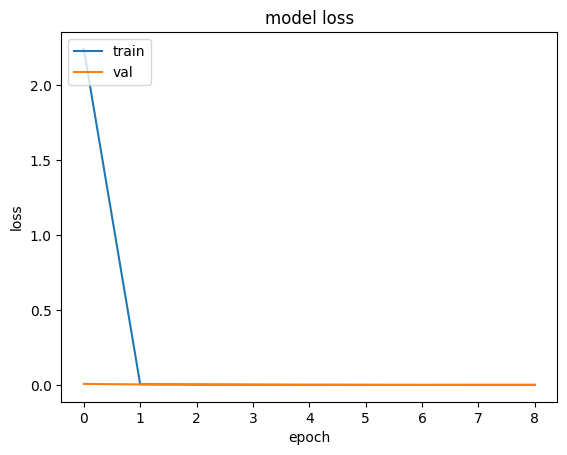

In [16]:
from matplotlib import pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

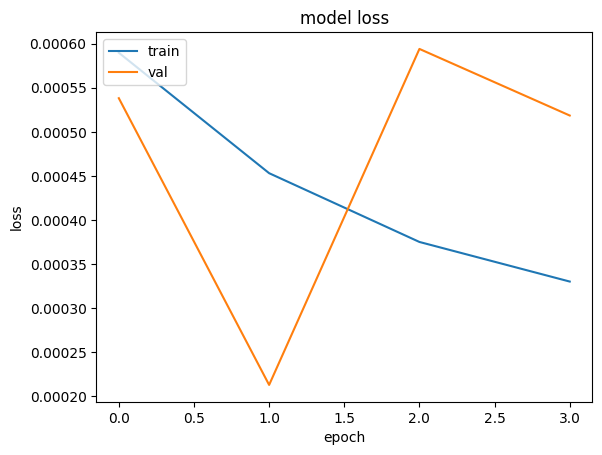

In [17]:
from matplotlib import pyplot as plt
plt.plot(history.history['loss'][5:])
plt.plot(history.history['val_loss'][5:])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

### ٍEvaluate Model

In [20]:
model.evaluate(X_test,Y_test)

6098/6098 [==============================] - 11s 2ms/step - loss: 5.6891e-04


0.0005689122481271625

In [19]:
y_predicted = model.predict(X_test)

from sklearn.metrics import (
    mean_absolute_error,
    mean_squared_error,
    r2_score,
)

print('MAE: ',mean_absolute_error(Y_test, y_predicted))
print('MSE: ',mean_squared_error(Y_test, y_predicted))
print('R2_score: ',r2_score(Y_test, y_predicted))


6098/6098 [==============================] - 11s 2ms/step
MAE:  0.008117436613241257
MSE:  0.0005689126557795001
R2_score:  0.9997207890952038


### Let's test the model

In [24]:
test_data = X_test.iloc[:1]
print("Data :")
display(test_data)
print("------------------------------------")
print("lable :",)
display(Y_test.iloc[:1])
print("------------------------------------")
predicted = model.predict(test_data)
print("------------------------------------")
print(f"Model scaled Prediction is : {predicted}")
output = inverse_log_normalize(predicted[0][0])
print(f"Model Prediction is : {output}")

Data :


,x_1,x_2
803131,8.089789,7.847372


------------------------------------
lable :


,y
803131,15.935766


------------------------------------
1/1 [==============================] - 0s 70ms/step
------------------------------------
Model scaled Prediction is : [[15.940862]]
Model Prediction is : 8375836.5


### Let's test the model via unseen data

In [43]:
num_1 = 8000
num_2 = 3000
unseen_data = log_normalize(np.array([[num_1,num_2]]))
print("Data :",unseen_data)
print("Label :" )
print("Actual Multiplication :",num_1*num_2 +5)
print("------------------------------------")
predicted = model.predict([unseen_data])
print("------------------------------------")
print(f"Model scaled Prediction is : {predicted}")
output = inverse_log_normalize(predicted[0][0])
print(f"Model Prediction is : {output}")

Data : [[8.98744679 8.00703401]]
Label :
Actual Multiplication : 24000005
------------------------------------
1/1 [==============================] - 0s 76ms/step
------------------------------------
Model scaled Prediction is : [[17.00193]]
Model Prediction is : 24201620.0


In [44]:
num_1 = 25
num_2 = 14
unseen_data = log_normalize(np.array([[num_1,num_2]]))
print("Data :",unseen_data)
print("Label :" )
print("Actual Multiplication :",num_1*num_2 +5)
print("------------------------------------")
predicted = model.predict(unseen_data[:,:2])
print("------------------------------------")
print(f"Model scaled Prediction is : {predicted}")
output = inverse_log_normalize(predicted[0][0])
print(f"Model Prediction is : {output}")

Data : [[3.29583687 2.77258872]]
Label :
Actual Multiplication : 355
------------------------------------
1/1 [==============================] - 0s 104ms/step
------------------------------------
Model scaled Prediction is : [[6.040133]]
Model Prediction is : 417.94891357421875


## Save and Load Model

In [29]:
from keras.models import Sequential, model_from_json

# serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")

# later...

# load json and create model
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model.h5")
print("Loaded model from disk")

# evaluate loaded model on test data
loaded_model.compile(loss='mse', optimizer='adam', metrics=['mae'])
score = loaded_model.evaluate(X_test, Y_test, verbose=0)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

Saved model to disk
Loaded model from disk
mae: 0.81%


In [45]:
num_1 = 25
num_2 = 14
unseen_data = log_normalize(np.array([[num_1,num_2]]))
print("Data :",unseen_data)
print("Label :" )
print("Actual Multiplication :",num_1*num_2 +5)
print("------------------------------------")
predicted = model.predict(unseen_data[:,:2])
print("------------------------------------")
print(f"Model scaled Prediction is : {predicted}")
output = inverse_log_normalize(predicted[0][0])
print(f"Model Prediction is : {output}")

Data : [[3.29583687 2.77258872]]
Label :
Actual Multiplication : 355
------------------------------------
1/1 [==============================] - 0s 35ms/step
------------------------------------
Model scaled Prediction is : [[6.040133]]
Model Prediction is : 417.94891357421875
